In [177]:
# Importing necessary imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set()

In [178]:
#!pip install lux

In [179]:
#import lux

In [180]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [181]:
df.shape

(400, 26)

In [182]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [183]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [184]:
# duplicates - cleaning part
df.duplicated().sum()

0

In [185]:
# missing value checks
df.isnull().sum().sum()

1009

In [186]:
df.isnull().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [188]:
# Finding the unique values in the given columns

for i in df.columns:
    print("************************************", i ,  "****************************")
    print()
    print(set(df[i].tolist()))
    print()

************************************ id ****************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,

In [189]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [190]:
df['pcv'] = df['pcv'].apply(lambda x:'43' if x=='\t43' else x)
df['pcv'] = df['pcv'].apply(lambda x:'41' if x=='\t?' else x)

In [191]:
df['wc'] = df['wc'].apply(lambda x:'6200' if x=='\t6200' else x)
df['wc'] = df['wc'].apply(lambda x:'8400' if x=='\t8400' else x)
df['wc'] = df['wc'].apply(lambda x:'9800' if x=='\t?' else x)

In [192]:
df['pcv'].mode()[0]

'41'

In [193]:
df['rc'] = df['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

In [194]:
df['classification'] = df['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [195]:
df['cad'] = df['cad'].apply(lambda x:'no' if x=='\tno' else x)

In [196]:
df['dm'] = df['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
df['dm'] = df['dm'].apply(lambda x:'no' if x=='\tno' else x)
df['dm'] = df['dm'].apply(lambda x:'yes' if x==' yes' else x)

In [197]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df[i]=df[i].apply(lambda x:float(x))

In [198]:
# Finding the unique values in the given columns

for i in df.columns:
    print("************************************", i ,  "****************************")
    print()
    print(set(df[i].tolist()))
    print()

************************************ id ****************************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148

In [199]:
df.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [200]:
print(df['pcv'].mode()[0])
print()
print(df['wc'].mode()[0])
print()
print(df['rc'].mode()[0])

41

9800

5.2


In [201]:
df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])
df['wc'] = df['wc'].fillna(df['wc'].mode()[0])
df['rc'] = df['rc'].fillna(df['rc'].mode()[0])

In [202]:
df['pcv'] = df['pcv'].astype('int64')
df['wc'] = df['wc'].astype('int64')
df['rc'] = df['rc'].astype('float64')

In [203]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type Columns :")
print(object_columns)


numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical type Columns :")
print(numerical_columns)

Object type Columns :
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

Numerical type Columns :
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')


In [204]:
#pcv               17.50
#wc                26.25
#rc                32.50

In [205]:
from sklearn.impute import SimpleImputer
imp_mode1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode2 = SimpleImputer(missing_values=np.nan, strategy='median')
df_imp1 = pd.DataFrame(imp_mode1.fit_transform(df[object_columns]))
df_imp1.columns = df[object_columns].columns
df_imp2 = pd.DataFrame(imp_mode2.fit_transform(df[numerical_columns]))
df_imp2.columns = df[numerical_columns].columns

In [206]:
df[object_columns].columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [207]:
print(df_imp1.isnull().sum().sum())
print()
print(df_imp2.isnull().sum().sum())

0

0


In [208]:
df_imp1

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [209]:
df_imp2

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [210]:
df_imp1

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [211]:
df_imp2 = df_imp2.iloc[:,1:]
df_imp2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


<Axes: ylabel='age'>

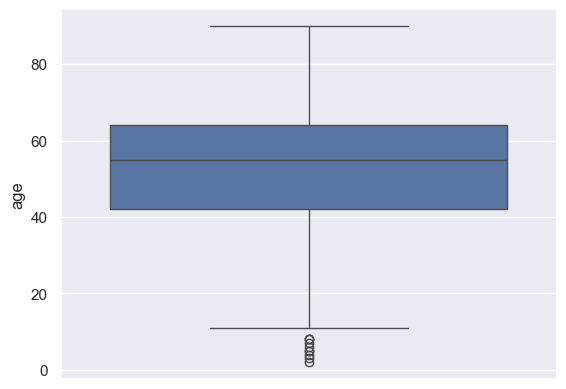

In [212]:
sns.boxplot(y='age', data=df_imp2)

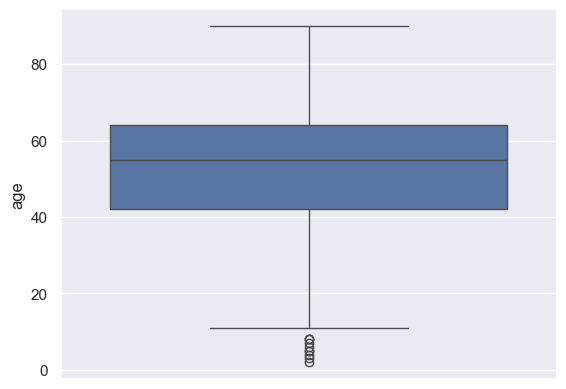

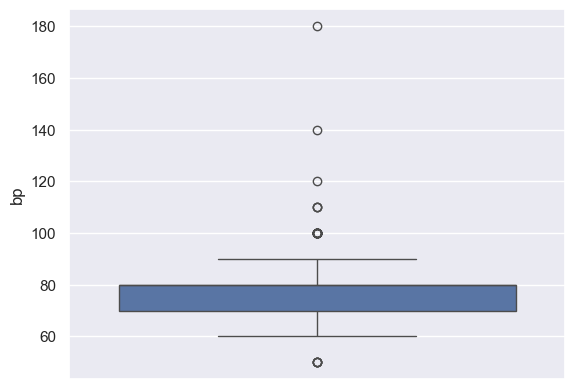

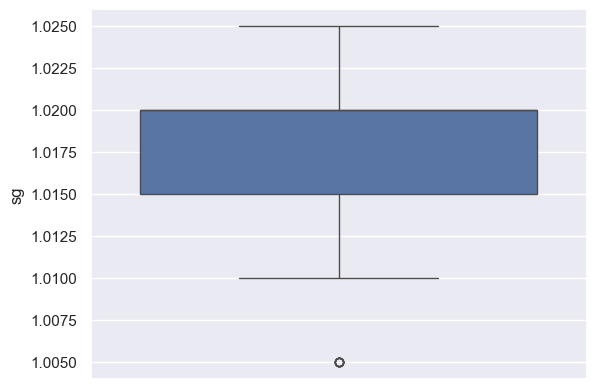

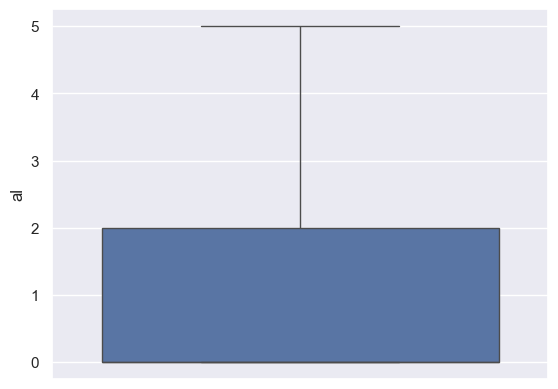

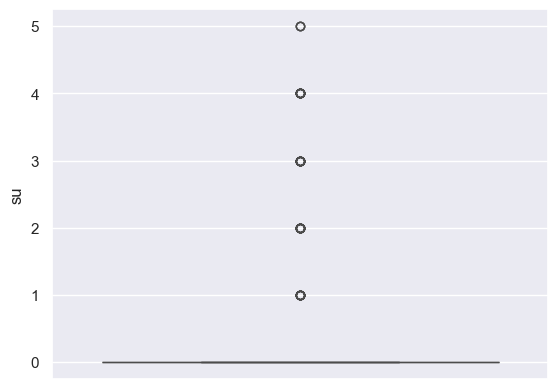

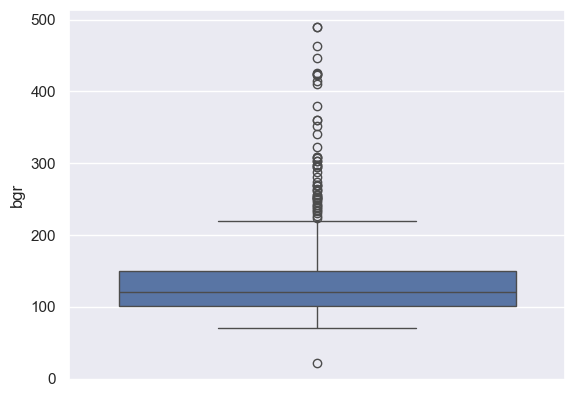

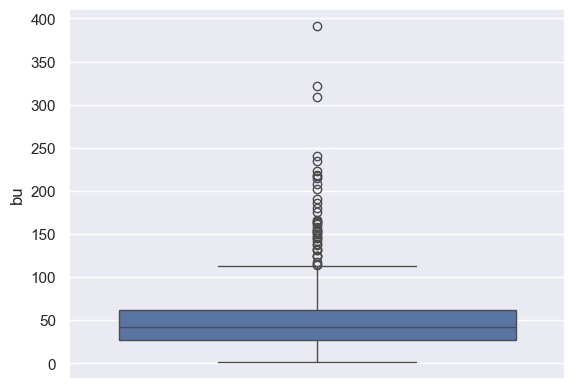

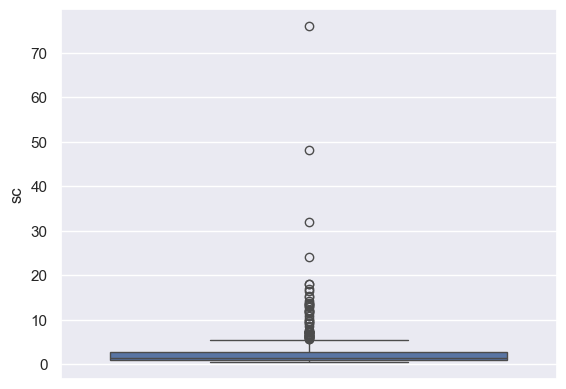

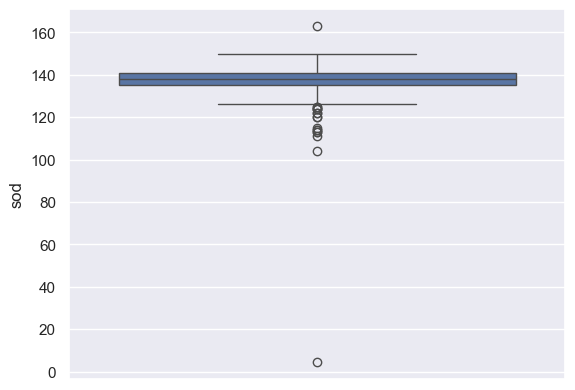

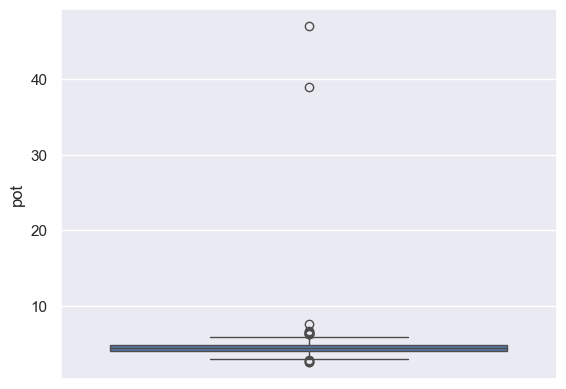

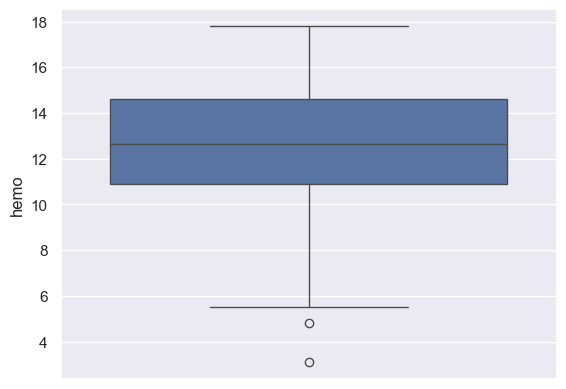

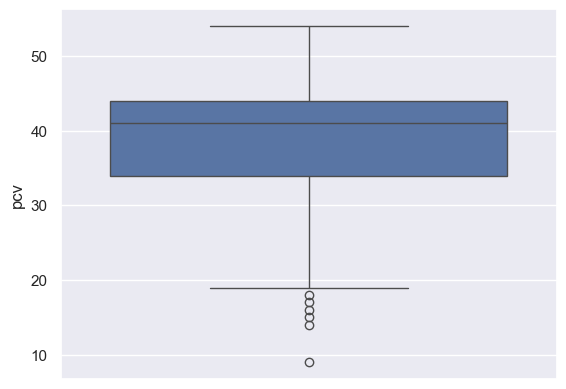

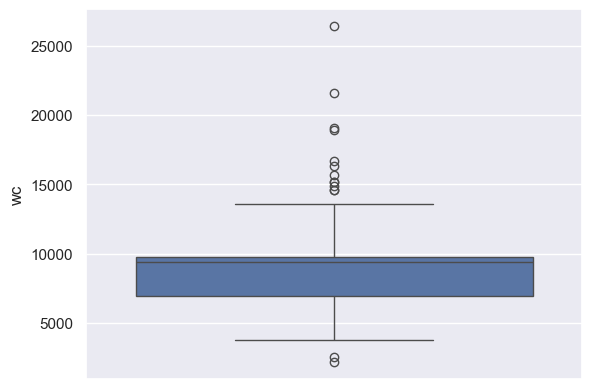

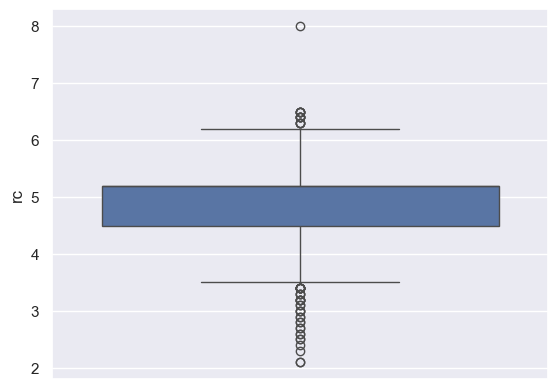

In [213]:
# Checking outlier
def boxplots(col):
    sns.boxplot(df_imp2[col])
    plt.show()

for i in list(df_imp2.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [214]:
df_imp1.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [215]:
df_imp2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [216]:
df_imp1['test'] = 'test'
df_imp2['test'] = 'test'

In [217]:
table_df = pd.concat([df_imp1,df_imp2], axis=1)
table_df

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,test
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,test
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,test
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,test
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,test
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,test
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,test
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,test
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,test


In [218]:
table_df.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'test', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'test'],
      dtype='object')

In [219]:
table_df = table_df.drop(['test'], axis=1)
table_df.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [220]:
# split the data into independent and dependent variables
x = table_df.drop('classification', axis=1)
y = table_df['classification']

In [221]:
x.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [222]:
y

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [223]:
y.value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [224]:
y = np.where(y=='ckd', 1,0)

In [225]:
pd.DataFrame(y).value_counts()

0
1    250
0    150
Name: count, dtype: int64

In [226]:
# Handing encoding concept 
def classify_features(x):
    categorical_features =[]
    non_categorical_features = []
    discreate_features = []
    continous_features = []
    for column in x.columns:
        if x[column].dtype=='object':
            if x[column].nunique() < 3:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif x[column].dtype in ['int64','float64']:
            if x[column].nunique() < 100:
                discreate_features.append(column)
            else:
                continous_features.append(column)
    return categorical_features, non_categorical_features, discreate_features, continous_features

In [227]:
categorical, non_categorical, discreate, continous = classify_features(x)

In [228]:
categorical

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [229]:
non_categorical

[]

In [230]:
discreate

['age', 'bp', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'pcv', 'wc', 'rc']

In [231]:
continous

['bgr', 'bu', 'hemo']

# EDA

In [233]:
import dtale
dtale.show(df)

In [234]:
for i in categorical:
    print(x[i].value_counts())
    print()

rbc
normal      353
abnormal     47
Name: count, dtype: int64

pc
normal      324
abnormal     76
Name: count, dtype: int64

pcc
notpresent    358
present        42
Name: count, dtype: int64

ba
notpresent    378
present        22
Name: count, dtype: int64

htn
no     253
yes    147
Name: count, dtype: int64

dm
no     263
yes    137
Name: count, dtype: int64

cad
no     366
yes     34
Name: count, dtype: int64

appet
good    318
poor     82
Name: count, dtype: int64

pe
no     324
yes     76
Name: count, dtype: int64

ane
no     340
yes     60
Name: count, dtype: int64



In [235]:
df_dummies = pd.get_dummies(x[categorical], drop_first=True)

In [236]:
x[categorical]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [237]:
df_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,True,True,False,False,True,True,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False
2,True,True,False,False,False,True,False,True,False,True
3,True,False,True,False,True,False,False,True,True,True
4,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
395,True,True,False,False,False,False,False,False,False,False
396,True,True,False,False,False,False,False,False,False,False
397,True,True,False,False,False,False,False,False,False,False
398,True,True,False,False,False,False,False,False,False,False


In [238]:
df_dummies1 = np.where(df_dummies[0:]==True,1,0)
df_dummies1

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [239]:
df_dummies1 = pd.DataFrame(df_dummies1)
df_dummies1.columns = df_dummies.columns

In [240]:
df_dummies1

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,1,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1
3,1,0,1,0,1,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0
396,1,1,0,0,0,0,0,0,0,0
397,1,1,0,0,0,0,0,0,0,0
398,1,1,0,0,0,0,0,0,0,0


In [241]:
df1 = pd.concat([x.drop(columns=categorical), df_dummies1], axis=1)

In [242]:
df1.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0


In [243]:
df1.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,...,0.882500,0.810000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,...,0.322418,0.392792,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='bu'>

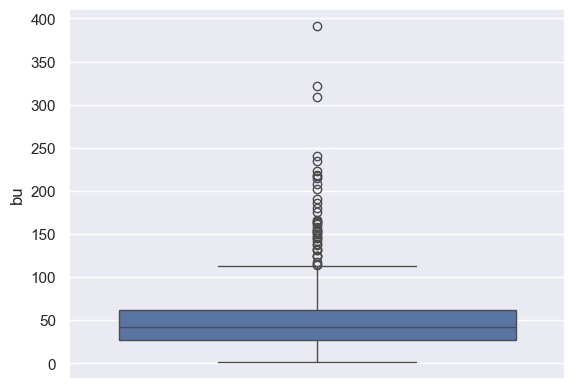

In [244]:
sns.boxplot(y='bu', data=df1)

# preprocessing part *******very very important 
1. part 1 - missing value treatement done
2. part 2 - encoding part done (char variable only)
3. part 3 - outlier treatement - not required (numerical variable only)
4. part 4 - Feature scaling (normalization or standarization) - depends basis the result
5. part 5 - Imbalance treatement (this is only application with classification problem)

In [246]:
pd.DataFrame(y).value_counts(normalize=True)

0
1    0.625
0    0.375
Name: proportion, dtype: float64

# split the data into train and test

In [248]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42, stratify=y)

In [249]:
pd.DataFrame(y_train).value_counts()

0
1    200
0    120
Name: count, dtype: int64

In [250]:
pd.DataFrame(y_test).value_counts()

0
1    50
0    30
Name: count, dtype: int64

# Building Maching Learning (Traditional Algorithm)

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

      Method Used  Accuracy
0  LogitRegession    0.8375
1           Dtree    0.9750
2         RForest    1.0000
3             XGB    0.9875
4             KNN    0.7000
5             SVM    0.7125
6             NBT    0.9750
7          Voting    0.9750
Axes(0.125,0.11;0.775x0.77)


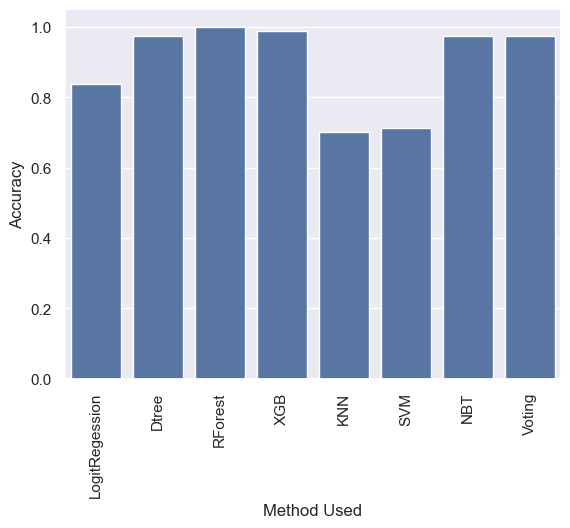

In [253]:
list_met = []
list_accuracy = []

# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)                          
                               

In [254]:
# Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)
accuracy_evc_train = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print("************************")
print("Training Accuracy :",accuracy_evc_train)
print("************************")
print("Testb Accuracy :",accuracy_evc_test)

************************
Training Accuracy : 1.0
************************
Testb Accuracy : 0.975


# Cross Validation

In [256]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model_evc, x_train, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Testb Accuracy :",accuracy_evc_test)

Training Accuracy : 0.9875
***************
Testb Accuracy : 0.975


In [257]:
training

array([1.     , 0.9375 , 1.     , 0.96875, 1.     , 1.     , 0.96875,
       1.     , 1.     , 1.     ])

In [258]:
print("************************")
print("Training Accuracy :",classification_report(y_train, pred_evc_train))
print("************************")
print("Testb Accuracy :",classification_report(y_test, pred_evc_test))

************************
Training Accuracy :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

************************
Testb Accuracy :               precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.98      0.98      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [259]:
print("************************")
print(confusion_matrix(y_train, pred_evc_train))
print("************************")
print(confusion_matrix(y_test, pred_evc_test))

************************
[[120   0]
 [  0 200]]
************************
[[29  1]
 [ 1 49]]


In [260]:
# Deployment part
# Automation part - few line code
# HyperParameter tuning - 